# Final Project
## Joshua Grou and Raja Agireddy

In [1]:
import torch
import torchvision
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=0)

#images, labels = next(img_gen.flow_from_directory('./Data/train'))

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [3]:
training_data = torchvision.datasets.ImageFolder('./Data/train', transform = ToTensor())
testing_data = torchvision.datasets.ImageFolder('./Data/test', transform = ToTensor())
validation_data = torchvision.datasets.ImageFolder('./Data/valid', transform = ToTensor())

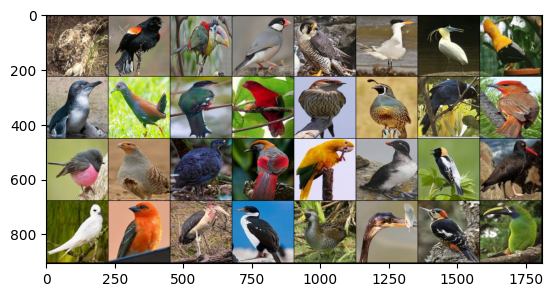

COMMON POORWILL RED WINGED BLACKBIRD CURL CRESTED ARACURI JAVA SPARROW PEREGRINE FALCON CASPIAN TERN CAPPED HERON COCK OF THE  ROCK FAIRY PENGUIN BLACK TAIL CRAKE CUBAN TROGON CHATTERING LORY STRIPPED SWALLOW GAMBELS QUAIL AZURE JAY HEPATIC TANAGER PINK ROBIN GRAY PARTRIDGE GREAT TINAMOU RED TAILED THRUSH GOLDEN PARAKEET PARAKETT  AKULET BOBOLINK AFRICAN OYSTER CATCHER FAIRY TERN RED FODY MARABOU STORK IMPERIAL SHAQ SORA  ANHINGA DARJEELING WOODPECKER BLUE THROATED TOUCANET


In [4]:
batch_size = 32
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=batch_size, shuffle=True)
def imshow(img):
    img = img
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
classes = training_data.classes
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [61]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(44944, 22472)
        self.fc2 = nn.Linear(22472, 11236)
        self.fc3 = nn.Linear(11236, 450)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [47]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [68]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

net = net.to(device)
print(device)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

cuda:0


OutOfMemoryError: CUDA out of memory. Tried to allocate 964.00 MiB (GPU 0; 10.00 GiB total capacity; 8.47 GiB already allocated; 206.07 MiB free; 8.47 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF